# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [6]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')
display(heroes_df.head())
display(powers_df.head())
heroes_df.columns

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Index(['Unnamed: 0', 'name', 'Gender', 'Eye color', 'Race', 'Hair color',
       'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [7]:
heroes_df = heroes_df.drop(columns='Unnamed: 0')

## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [8]:
display(heroes_df.info())
display(heroes_df.describe())

display(powers_df.info())
display(powers_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


None

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


None

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Feral,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
_____________________________________________________________________________________________________________________

For Publisher, I've decided to replace null values with Unknown
For Height & Weight, I am replacing -99 with the respective median value 
For other columns, I am replacing '-' with 'unknown'



In [9]:
# heroes_df.info()
# powers_df.info()

# 15 nulls in Publisher, 2 nulls in Weight

# heroes_df.Publisher.value_counts()

heroes_df.columns = [column.lower().replace(' - ', '_').replace(' ', '_') for column in heroes_df.columns]
powers_df.columns = [column.lower().replace(' - ', '_').replace(' ', '_') for column in powers_df.columns]

heroes_df.publisher = heroes_df.publisher.fillna('Unknown')
heroes_df.publisher.value_counts()

heroes_df.weight = heroes_df.weight.fillna(heroes_df.weight.median())
heroes_df.weight.isna().sum()

heroes_df.height.value_counts()

heroes_df.height = heroes_df.height.replace(-99.0, heroes_df.height.median())
heroes_df.height.value_counts()

heroes_df.weight = heroes_df.weight.replace(-99.0, heroes_df.weight.median())
heroes_df.weight.value_counts()

62.0     242
54.0      23
79.0      23
81.0      22
90.0      19
        ... 
412.0      1
38.0       1
96.0       1
320.0      1
855.0      1
Name: weight, Length: 134, dtype: int64

In [10]:
heroes_df['skin_color'].value_counts()
heroes_df['skin_color'] = heroes_df['skin_color'].replace('-', 'unknown')
heroes_df['eye_color'] = heroes_df['eye_color'].replace('-', 'unknown')
heroes_df['hair_color'] = heroes_df['hair_color'].replace('-', 'unknown')
heroes_df['alignment'] = heroes_df['alignment'].replace('-', 'unknown')
heroes_df['race'] = heroes_df['race'].replace('-', 'Unknown')

In [12]:
powers_df.describe()
powers_df.columns

Index(['hero_names', 'agility', 'accelerated_healing', 'lantern_power_ring',
       'dimensional_awareness', 'cold_resistance', 'durability', 'stealth',
       'energy_absorption', 'flight',
       ...
       'web_creation', 'reality_warping', 'odin_force', 'symbiote_costume',
       'speed_force', 'phoenix_force', 'molecular_dissipation', 'vision_cryo',
       'omnipresent', 'omniscient'],
      dtype='object', length=168)

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In [16]:
#powers_df = powers_df.set_index('hero_names')
#heroes_df = heroes_df.set_index('name')
joined_df = heroes_df.join(powers_df, lsuffix='_heroes', rsuffix='_powers')
joined_df.columns

Index(['gender', 'eye_color', 'race', 'hair_color', 'height', 'publisher',
       'skin_color', 'alignment', 'weight', 'agility',
       ...
       'web_creation', 'reality_warping', 'odin_force', 'symbiote_costume',
       'speed_force', 'phoenix_force', 'molecular_dissipation', 'vision_cryo',
       'omnipresent', 'omniscient'],
      dtype='object', length=176)

In [17]:
joined_df.describe()

,height,weight
count,734.000000,734.000000
mean,183.259537,95.889646
std,50.001138,88.689658
min,15.200000,2.000000
25%,175.000000,62.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [18]:
joined_df.columns
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 734 entries, A-Bomb to Zoom
Columns: 176 entries, gender to omniscient
dtypes: float64(2), object(174)
memory usage: 1015.0+ KB


In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

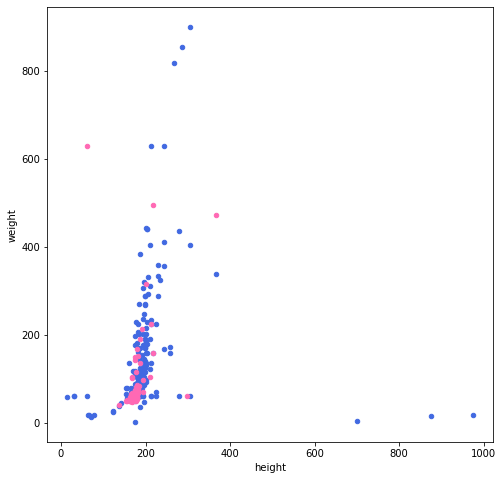

In [19]:
male_heroes_df = heroes_df.loc[heroes_df['gender'] == 'Male']
female_heroes_df = heroes_df.loc[heroes_df['gender'] == 'Female']

ax = male_heroes_df.plot(x='height', y='weight', kind='scatter', color='royalblue', figsize=(8, 8))
female_heroes_df.plot(x='height', y='weight', kind='scatter', color='hotpink', figsize=(8, 8), ax=ax)



## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [20]:
def show_distplot(dataframe, gender, column_name):
    return sns.distplot(dataframe.loc[dataframe['gender'] == gender][column_name])

    


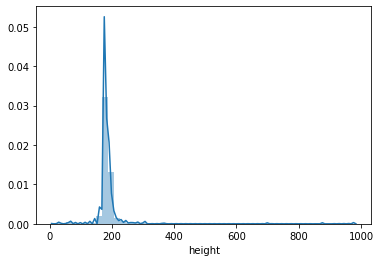

In [24]:
# Male Height
show_distplot(heroes_df, 'Male', 'height')

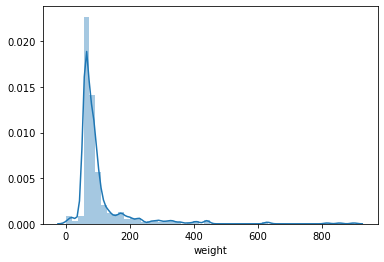

In [25]:
# Male Weight
show_distplot(heroes_df, 'Male', 'weight')

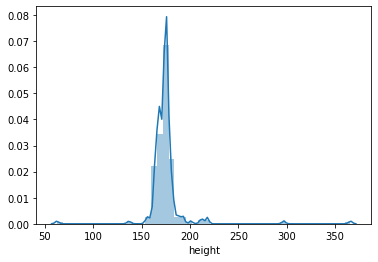

In [26]:
# Female Height
show_distplot(heroes_df, 'Female', 'height')

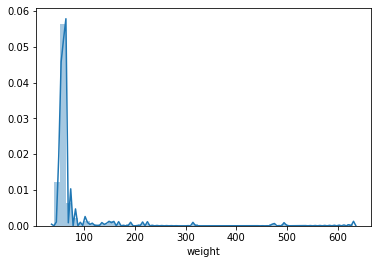

In [27]:
# Female Weight
show_distplot(heroes_df, 'Female', 'weight')

In [28]:
display(male_heroes_df.describe())
display(female_heroes_df.describe())

,height,weight
count,505.000000,505.000000
mean,187.033663,104.675248
std,58.438477,95.550730
min,15.200000,2.000000
25%,175.000000,62.000000
50%,180.000000,79.000000
75%,188.000000,101.000000
max,975.000000,900.000000


,height,weight
count,200.00000,200.000000
mean,174.77250,73.955000
std,20.08911,65.245597
min,62.50000,41.000000
25%,168.00000,55.000000
50%,175.00000,62.000000
75%,175.00000,62.000000
max,366.00000,630.000000


Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
super_strength         2160
stamina                1734
durability             1542
super_speed            1494
agility                1452

* What are the 5 most common powers in the Marvel Universe?
super_strength 	 204
durability 	 154
stamina 	 150
super_speed 	 137
agility 	 126

* What are the 5 most common powers in the DC Universe?
super_strength 	 109
stamina 	     90
flight 	 86
super_speed 	 79
agility 	 71

In [67]:
for column in powers_df.columns:
    powers_df.loc["Total", column] = powers_df[column].sum()
    
powers_df.loc["Total"].sort_values(ascending=False).head(20)

#joined_df.reset_index()

marvel_df = joined_df.loc[joined_df['publisher'] == 'Marvel Comics']
dc_df = joined_df.loc[joined_df['publisher'] == 'DC Comics']

marvel_top_powers = {}
dc_top_powers = {}

for column in marvel_df.drop(columns=['height', 'weight', 'gender', 'eye_color', 'race', 'hair_color', 'publisher', 'skin_color', 'alignment']).columns:
    marvel_top_powers[column] = marvel_df[column].sum()


while len(marvel_top_powers) > 0:
    x = max(marvel_top_powers, key=marvel_top_powers.get)
    print(x, '\t', marvel_top_powers.pop(x))

for column in dc_df.drop(columns=['height', 'weight', 'gender', 'eye_color', 'race', 'hair_color', 'publisher', 'skin_color', 'alignment']).columns:
    dc_top_powers[column] = dc_df[column].sum()

while len(dc_top_powers) > 0:    
    x = max(dc_top_powers, key=dc_top_powers.get)
    print(x, '\t', dc_top_powers.pop(x))
    


super_strength 	 204
durability 	 154
stamina 	 150
super_speed 	 137
agility 	 126
flight 	 111
accelerated_healing 	 100
reflexes 	 97
energy_blasts 	 87
longevity 	 60
intelligence 	 59
telepathy 	 57
invulnerability 	 53
stealth 	 47
marksmanship 	 47
enhanced_senses 	 45
energy_absorption 	 43
force_fields 	 43
teleportation 	 39
natural_weapons 	 39
psionic_powers 	 38
weapons_master 	 36
telekinesis 	 36
weapon-based_powers 	 34
shapeshifting 	 34
immortality 	 34
toxin_and_disease_resistance 	 32
size_changing 	 31
energy_manipulation 	 31
animal_oriented_powers 	 30
molecular_manipulation 	 30
wallcrawling 	 30
jump 	 29
heat_resistance 	 27
telepathy_resistance 	 26
cold_resistance 	 25
magic 	 24
energy_beams 	 23
enhanced_hearing 	 23
illusions 	 23
danger_sense 	 20
astral_projection 	 20
fire_control 	 19
vision_night 	 19
natural_armor 	 18
vision_telescopic 	 18
animal_attributes 	 17
self-sustenance 	 17
dimensional_awareness 	 16
levitation 	 16
web_creation 	 16
rege

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
_____________________________________________________________________________________________________________________

The top 5 powers are very similar across Marvel, DC, and the entire superheroes dataset. In DC, flight is just swapped in for durability, and everything else is basically identical.

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [70]:
heroes_df.loc[heroes_df.race == 'Alien']

,gender,eye_color,race,hair_color,height,publisher,skin_color,alignment,weight
name,,,,,,,,,
Ardina,Female,white,Alien,Orange,193.0,Marvel Comics,gold,good,98.0
Blackwulf,Male,red,Alien,White,188.0,Marvel Comics,unknown,unknown,88.0
Century,Male,white,Alien,White,201.0,Marvel Comics,grey,good,97.0
Doomsday,Male,red,Alien,White,244.0,DC Comics,unknown,bad,412.0
Evilhawk,Male,red,Alien,Black,191.0,Marvel Comics,green,bad,106.0
Indigo,Female,unknown,Alien,Purple,175.0,DC Comics,unknown,neutral,62.0
Silver Surfer,Male,white,Alien,No Hair,193.0,Marvel Comics,silver,good,101.0


## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data